# Objecctive:-We want predict fire size the forest according the given attributes

In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\Data sets\\forestfires.csv")

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Coverting the size_category into the integers
data.size_category.replace(("small","large"),(0,1),inplace=True)

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>, <AxesSubplot:>]],
      dtype=object)

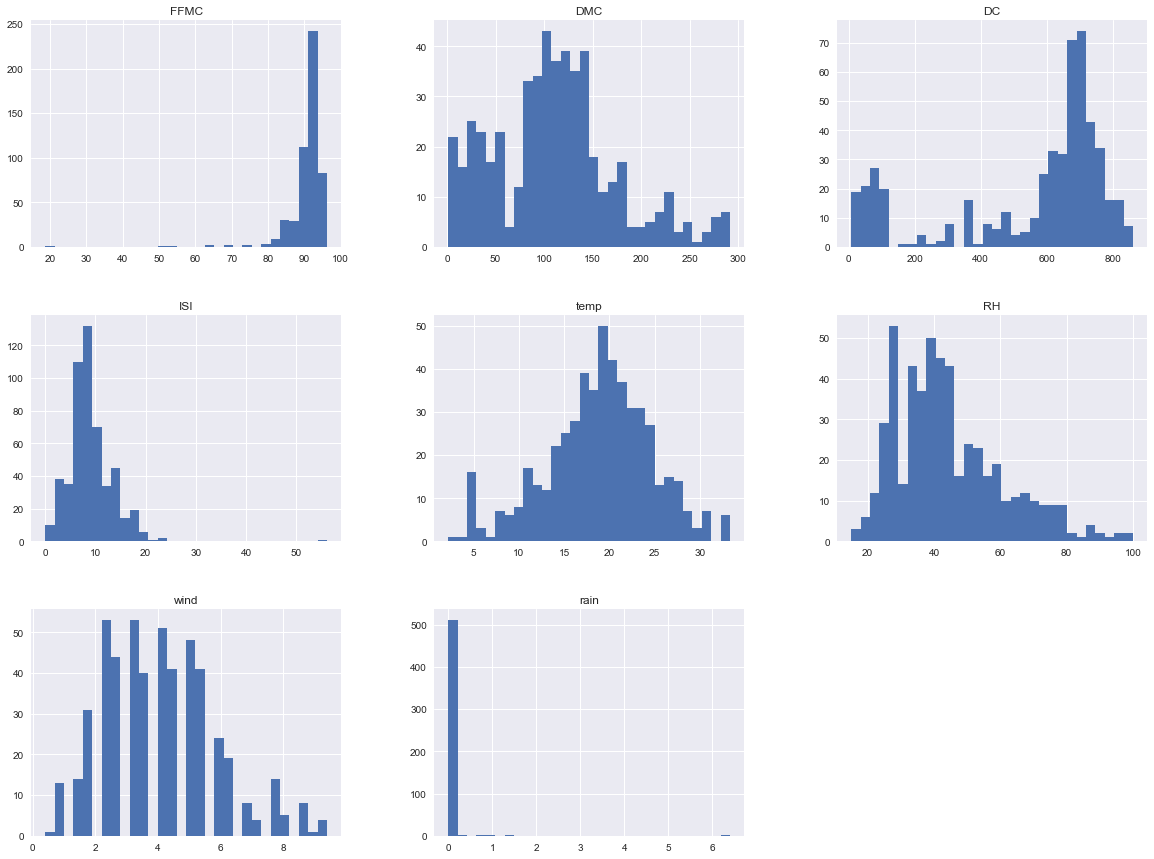

In [7]:
# Libraries and configurations for figure plotting
plt.style.use('seaborn')
data[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain']].hist(bins=30, figsize=(20,15)) # plotting the histogram

<AxesSubplot:>

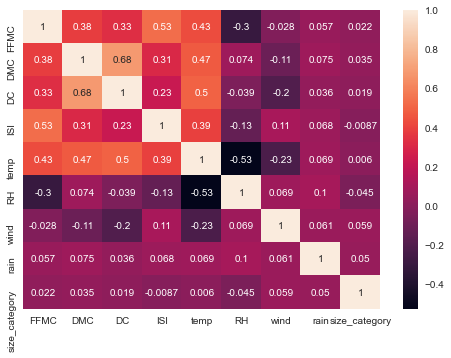

In [8]:
# Correlation analysis of the dataset
sns.heatmap(data[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain',"size_category"]].corr(),annot=True)

In [9]:
x=data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']]
y=data.size_category

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

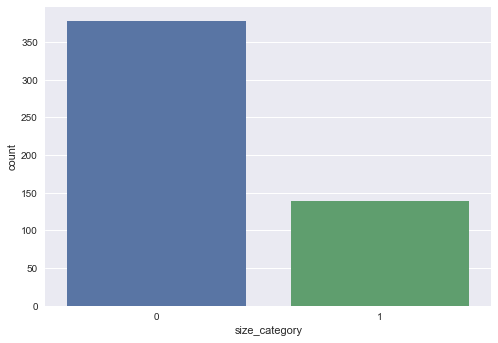

In [10]:
sns.countplot(data["size_category"])

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [12]:
# Linear Support Vector Machine
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7564102564102564


In [13]:
# Radical Support Vector Machine
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.7564102564102564


In [14]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical)

The accuracy of sigmoid SVC Model is 0.75


In [15]:
from sklearn.svm import SVC
svc = SVC(gamma=0.33)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7564102564102564


In [16]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='poly',C=1,gamma=.33)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical) 

The accuracy of poly SVC Model is 0.9871794871794872


In [17]:
clf =svm.SVC(kernel='poly',C=1,gamma=.33)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 98.71794871794873


array([[116,   1],
       [  1,  38]], dtype=int64)

In [18]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       117
           1       0.97      0.97      0.97        39

    accuracy                           0.99       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print ("Mean Squared Error : ", mean_squared_error(Y_test, y_pred))
print ("r2 Score : ", r2_score(Y_test, y_pred))

Mean Squared Error :  0.01282051282051282
r2 Score :  0.9316239316239316


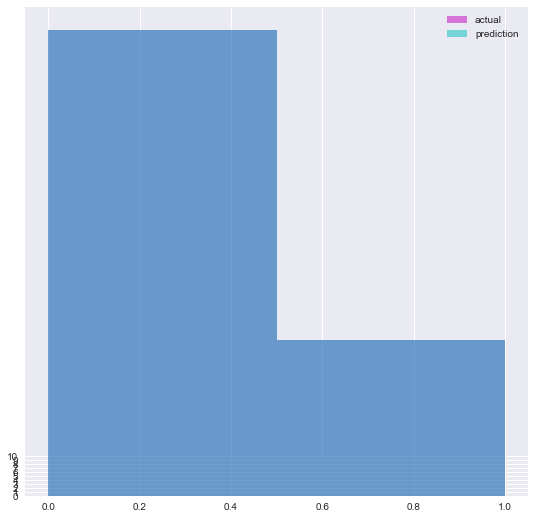

In [20]:
#Classification graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins=2)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion:- As per analyse of different type of models polynomial kernal is giving best result with 98.7% accuracy.